In [2]:
import cv2
import imutils
import json
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import requests
import time
from base64 import b64encode
from IPython.display import Image
from pylab import rcParams

In [3]:
rcParams['figure.figsize'] = 10, 20

In [4]:
def makeImageData(imgpath):
    img_req = None
    with open(imgpath, 'rb') as f:
        ctxt = b64encode(f.read()).decode()
        img_req = {
            'image': {
                'content': ctxt
            },
            'features': [{
                'type': 'DOCUMENT_TEXT_DETECTION',
                'maxResults': 1
            }]
        }
    return json.dumps({"requests": img_req}).encode()

In [5]:
def requestOCR(url, api_key, imgpath):
  imgdata = makeImageData(imgpath)
  response = requests.post(ENDPOINT_URL, 
                           data = imgdata, 
                           params = {'key': api_key}, 
                           headers = {'Content-Type': 'application/json'})
  return response

In [6]:
with open('vision api.json') as f:
    data = json.load(f)

In [7]:
ENDPOINT_URL = 'https://vision.googleapis.com/v1/images:annotate'
api_key = data["api_key"]
img_loc = "Image.jpg"

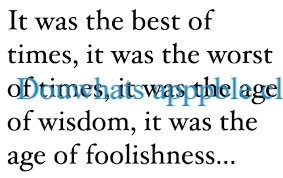

In [12]:
Image(img_loc)

In [13]:
result = requestOCR(ENDPOINT_URL, api_key, img_loc)

In [14]:
if result.status_code != 200 or result.json().get('error'):
    print("Error: OCR request failed or no text annotations found.")
else:
    # Extract text annotations from the response JSON
    text_annotations = result.json()['responses'][0].get('textAnnotations', [])
    
    # Iterate over text annotations and print the description
    for annotation in text_annotations:
        print(annotation["description"])

Error: OCR request failed or no text annotations found.


In [15]:
result     

<Response [403]>

In [16]:
for index in range(len(result)):
  print(result[index]["description"])

TypeError: object of type 'Response' has no len()